In [1]:
import numpy as np
from matplotlib import pyplot as plt
import os  
import glob
import sys 
import pygsp
from importlib import reload

from nilearn import plotting
import nibabel as nb
from sklearn.utils import Bunch
import pandas as pd

sys.path.append("/home/localadmin/Bureau/HUGO/repositories/gsp_neuro/gsp_neuro")
import data_loading as dload
reload(dload)
import plotting as plo

In [2]:
data_base_dir = "/home/localadmin/Bureau/HUGO/data/BIOPSYCHO_CTRLS/"
subject_ids_lut = "/home/localadmin/Bureau/HUGO/Ids.csv"

In [3]:
subject_ids = [sub.get('subjID') for sub in dload.get_ids_csv(subject_ids_lut)]
subject_folders = [subfolder for subfolder in glob.glob(data_base_dir + "sub-*") if subfolder[-8:] in subject_ids]

subjects_with_data = [folder[-8:] for folder in glob.glob(data_base_dir + "sub-*")]

print("These subjects were not found in the data directory : {}".format([sub for sub in subject_ids if sub not in subjects_with_data]))

These subjects were not found in the data directory : ['CHUVL340', 'CHUVL342', 'CHUVL364']


In [117]:
mysub_folder = subject_folders[0]
scale = 2
print("Current subject folder : " + mysub_folder)
connectome_paths = dload.get_sub_connectomes_paths(mysub_folder, scale=scale)

Current subject folder : /home/localadmin/Bureau/HUGO/data/BIOPSYCHO_CTRLS/sub-CHUVL435


In [118]:
df_coords = dload.read_coords(scale=scale)
rois2keep = list(df_coords[df_coords["Structures Names"].str.contains('ctx')].index)
G = pygsp.graphs.Graph(dload.load_connectome(connectome_paths[0]),lap_type='normalized')
G.set_coordinates(kind=df_coords[['XCoord(mm)','YCoord(mm)','ZCoord(mm)']].to_numpy())


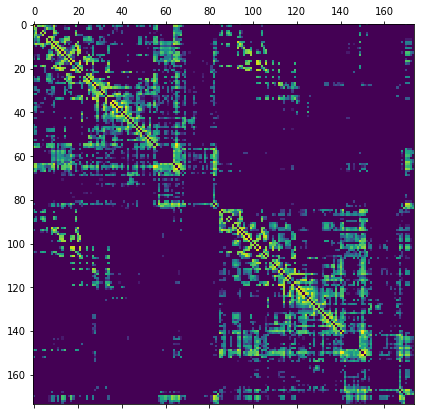

In [119]:
plt.figure(figsize=(7,7))
plt.matshow(np.log(G.W.todense(), out=np.zeros_like(G.W.todense()), where=(G.W.todense()!=0)), fignum=0)

In [120]:
G = G.subgraph(rois2keep)

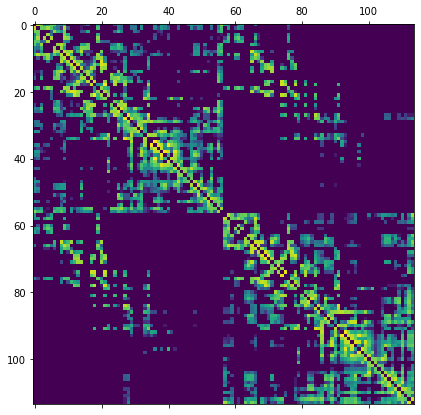

In [121]:
A = G.W.todense()
plt.figure(figsize=(7,7))
plt.matshow(np.log(A, out=np.zeros_like(A), where=(A!=0)), fignum=0)

In [122]:
G.is_connected()

True

In [123]:
G.compute_fourier_basis()

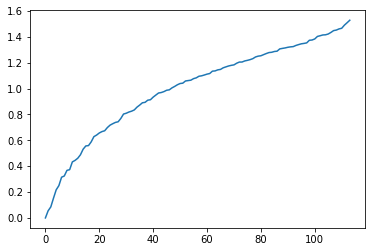

In [124]:
plt.plot(G.e)

(<Figure size 432x288 with 2 Axes>,
 <Axes3DSubplot:title={'center':'Graph(n_vertices=114, n_edges=1711)'}>)

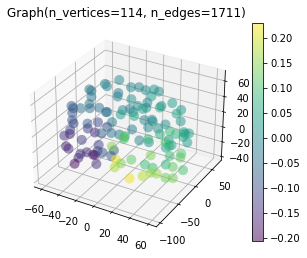

In [125]:
G.plot(G.U[:,1], edges=False)

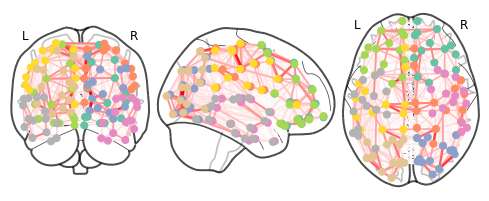

In [138]:
plotting.plot_connectome(G.W.toarray(), G.coords)
#plotting.show()

In [132]:
label_dir = '/home/localadmin/Bureau/HUGO/data/requestionforconnectomes/'

In [139]:
annots = [os.path.join(label_dir,'rh.atlas-laus2018_desc-scale{}.annot'.format(scale)),
            os.path.join(label_dir,'lh.atlas-laus2018_desc-scale{}.annot'.format(scale))]
annot_right = nb.freesurfer.read_annot(annots[0])
annot_left = nb.freesurfer.read_annot(annots[1])
labels_right = [elem.decode('utf-8') for elem in annot_right[2]]
labels_left = [elem.decode('utf-8') for elem in annot_left[2]]


In [148]:
annot_right[0].shape

(163842,)

In [153]:
atlas = Bunch(map_left=annot_left[0],
                map_right=annot_right[0])

parcellation_right = atlas['map_right']
roi_vect_right = np.zeros_like(parcellation_right, dtype=float) * np.nan
parcellation_left = atlas['map_left']
roi_vect_left = np.zeros_like(parcellation_left, dtype=float)*np.nan


In [106]:
inflated_path = '/home/localadmin/Bureau/HUGO/data/requestionforconnectomes/lh.inflated.gii'
pial_path = '/home/localadmin/Bureau/HUGO/data/requestionforconnectomes/lh.pial.gii'

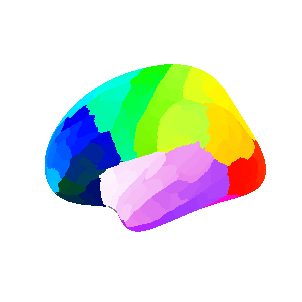

In [109]:
plotting.plot_surf_roi(inflated_path, roi_map=parcellation_left,
                       hemi='left', view='lateral');

In [157]:
labels_left

['unknown ',
 'lateralorbitofrontal_1 ',
 'lateralorbitofrontal_2 ',
 'parsorbitalis_1 ',
 'frontalpole_1 ',
 'medialorbitofrontal_1 ',
 'medialorbitofrontal_2 ',
 'parstriangularis_1 ',
 'parsopercularis_1 ',
 'rostralmiddlefrontal_1 ',
 'rostralmiddlefrontal_2 ',
 'superiorfrontal_1 ',
 'superiorfrontal_2 ',
 'superiorfrontal_3 ',
 'superiorfrontal_4 ',
 'caudalmiddlefrontal_1 ',
 'precentral_1 ',
 'precentral_2 ',
 'precentral_3 ',
 'paracentral_1 ',
 'rostralanteriorcingulate_1 ',
 'caudalanteriorcingulate_1 ',
 'posteriorcingulate_1 ',
 'isthmuscingulate_1 ',
 'postcentral_1 ',
 'postcentral_2 ',
 'supramarginal_1 ',
 'supramarginal_2 ',
 'superiorparietal_1 ',
 'superiorparietal_2 ',
 'superiorparietal_3 ',
 'inferiorparietal_1 ',
 'inferiorparietal_2 ',
 'inferiorparietal_3 ',
 'precuneus_1 ',
 'precuneus_2 ',
 'cuneus_1 ',
 'pericalcarine_1 ',
 'lateraloccipital_1 ',
 'lateraloccipital_2 ',
 'lateraloccipital_3 ',
 'lingual_1 ',
 'lingual_2 ',
 'fusiform_1 ',
 'fusiform_2 ',
 '

In [154]:
df_coords.head()

,Structures Names,XCoord(mm),YCoord(mm),ZCoord(mm),Colors(R),Colors(G),Colors(B)
0,ctx-rh-lateralorbitofrontal_1,25.69130,23.1930,-18.6736,230,145,40
1,ctx-rh-lateralorbitofrontal_2,20.98130,43.8564,-18.5707,175,17,75
2,ctx-rh-parsorbitalis_1,43.09160,41.1487,-13.4587,51,240,148
3,ctx-rh-frontalpole_1,7.93438,66.8742,-11.6957,160,233,142
4,ctx-rh-medialorbitofrontal_1,5.11145,51.7792,-11.9873,96,21,205


In [155]:
right_rois = df_coords[df_coords["Structures Names"].str.contains('ctx-rh')]
left_rois = df_coords[df_coords["Structures Names"].str.contains('ctx-lh')]


In [ ]:

for i in range(len(right_rois)):
    label_id = labels_right.index(right_rois[i])
    ids_roi = np.where(parcellation_right == label_id)[0]
    roi_vect_right[ids_roi] = roi_values[i]

for i in range(len(left_rois)):
    label_id = labels_left.index(left_rois[i])
    ids_roi = np.where(parcellation_left == label_id)[0]
    roi_vect_left[ids_roi] = roi_values[len(right_rois)+i]

fsaverage = nilearn.datasets.fetch_surf_fsaverage(mesh='fsaverage')
if vmin is None:
    vmin = min([0, min(roi_values)])
if vmax is None:
    vmax = max(roi_values)
if center_at_zero:
    max_val = max([abs(vmin), vmax])
    vmax = max_val
    vmin = -max_val
if fig is None:
    fig, axs = plt.subplots(1, 6, figsize=(18, 2),
                            subplot_kw={'projection': '3d'})

plotting.plot_surf_roi(fsaverage['pial_left'], roi_map=roi_vect_left,
                        hemi='left', view='medial',
                        bg_map=fsaverage['sulc_left'], bg_on_data=True,
                        darkness=.5, cmap=cmap,
                        vmin=vmin, vmax=vmax,
                        figure=fig, axes=axs[0])

plotting.plot_surf_roi(fsaverage['pial_right'], roi_map=roi_vect_right,
                        hemi='right', view='lateral',
                        bg_map=fsaverage['sulc_right'], bg_on_data=True,
                        darkness=.5, cmap=cmap,
                        vmin=vmin, vmax=vmax,
                        figure=fig, axes=axs[1])

plotting.plot_surf_roi(fsaverage['pial_right'], roi_map=roi_vect_right,
                        hemi='right', view='dorsal',
                        bg_map=fsaverage['sulc_right'], bg_on_data=True,
                        darkness=.5, cmap=cmap,
                        vmin=vmin, vmax=vmax,
                        figure=fig, axes=axs[2])

plotting.plot_surf_roi(fsaverage['pial_left'], roi_map=roi_vect_left,
                        hemi='left', view='dorsal',
                        bg_map=fsaverage['sulc_left'], bg_on_data=True,
                        darkness=.5, cmap=cmap,
                        vmin=vmin, vmax=vmax,
                        figure=fig, axes=axs[2])

plotting.plot_surf_roi(fsaverage['pial_left'], roi_map=roi_vect_left,
                        hemi='left', view='ventral',
                        bg_map=fsaverage['sulc_left'], bg_on_data=True,
                        darkness=.5, cmap=cmap,
                        vmin=vmin, vmax=vmax,
                        figure=fig, axes=axs[3])

plotting.plot_surf_roi(fsaverage['pial_right'], roi_map=roi_vect_right,
                        hemi='right', view='ventral',
                        bg_map=fsaverage['sulc_right'], bg_on_data=True,
                        darkness=.5, cmap=cmap,
                        vmin=vmin, vmax=vmax,
                        figure=fig, axes=axs[3])

plotting.plot_surf_roi(fsaverage['pial_left'], roi_map=roi_vect_left,
                        hemi='left', view='lateral',
                        bg_map=fsaverage['sulc_left'], bg_on_data=True,
                        darkness=.5, cmap=cmap,
                        vmin=vmin, vmax=vmax,
                        figure=fig, axes=axs[4])

plotting.plot_surf_roi(fsaverage['pial_right'], roi_map=roi_vect_right,
                        hemi='right', view='medial',
                        bg_map=fsaverage['sulc_right'], bg_on_data=True,
                        darkness=.5, cmap=cmap,
                        vmin=vmin, vmax=vmax,
                        figure=fig, axes=axs[5])

axs[2].view_init(elev=90, azim=270)
axs[3].view_init(elev=270, azim=90)
for i in range(6):
    if i in [2, 3]:
        axs[i].dist = 5.7
    else:
        axs[i].dist = 6

fig.tight_layout()